In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Class counts (class names):
leopard      200
cougar       116
flamingo     112
crocodile    107
butterfly     93
kangaroo      86
scorpion      84
llama         78
crab          73
crayfish      72
dragonfly     68
dolphin       65
elephant      64
rhino         59
beaver        46
pigeon        45
lobster       44
octopus       36
Name: count, dtype: int64

New class counts after augmentation (class names):
leopard      200
scorpion     200
llama        200
beaver       200
crayfish     200
crab         200
lobster      200
cougar       200
butterfly    200
dragonfly    200
pigeon       200
flamingo     200
dolphin      200
kangaroo     200
elephant     200
octopus      200
rhino        200
crocodile    200
Name: count, dtype: int64
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1735055856.557037    3376 service.cc:145] XLA service 0x78ec7000dd50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735055856.557141    3376 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/90 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.0078 - loss: 6.9341      

I0000 00:00:1735055866.973049    3376 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 ━━━━━━━━━━━━━━━━━━━━ 31s 113ms/step - accuracy: 0.1027 - loss: 3.5372 - val_accuracy: 0.0486 - val_loss: 3.4055
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.2415 - loss: 2.4031 - val_accuracy: 0.0486 - val_loss: 4.4580
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.3297 - loss: 2.0823 - val_accuracy: 0.0472 - val_loss: 5.7790
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.4116 - loss: 1.8396 - val_accuracy: 0.0472 - val_loss: 7.4226
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.4992 - loss: 1.5303 - val_accuracy: 0.0486 - val_loss: 7.5395
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.5890 - loss: 1.2705 - val_accuracy: 0.0486 - val_loss: 6.3856
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.6662 - loss: 1.0269 - val_accuracy: 0.2194 - val_loss: 2.9723
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.7181 - loss: 0.8574 - val_accuracy: 0.4972 - val_loss: 

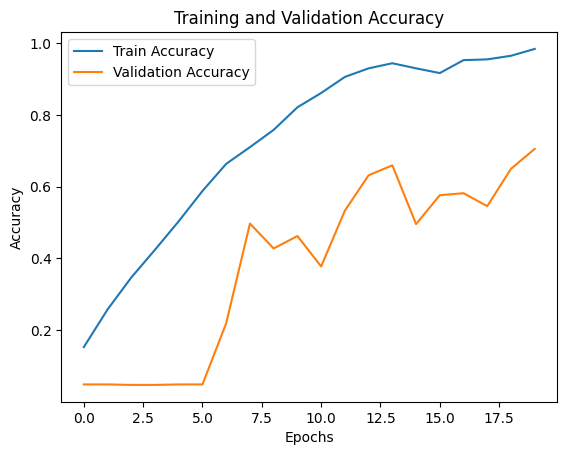

90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9325 - loss: 0.2206
Training accuracy: 93.16%
Model saved successfully.


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
#from tensorflow.keras.applications import MobileNet
import random
import matplotlib.pyplot as plt
import cv2

# === Step 1: Define Paths ===
image_folder = r"/kaggle/input/animal-kingdom-classification/AnimalTrainData/AnimalTrainData"
csv_path = r"/kaggle/input/animal-kingdom-classification/AnimalTrainData/AnimalTrainData/train.csv"

# === Step 2: Load CSV File ===
df = pd.read_csv(csv_path)

# === Step 3: Create a Mapping of Class Names to Integer Labels ===
class_mapping = {
    "beaver": 0, "butterfly": 1, "cougar": 2, "crab": 3, "crayfish": 4,
    "crocodile": 5, "dolphin": 6, "dragonfly": 7, "elephant": 8, "flamingo": 9,
    "kangaroo": 10, "leopard": 11, "llama": 12, "lobster": 13, "octopus": 14,
    "pigeon": 15, "rhino": 16, "scorpion": 17
}

# === Step 4: Map Image Names to Classes (Integer Labels) ===
image_to_class = dict(zip(df['ImageID'], df['Class']))

def preprocess_image(image_path, target_size=(224, 224)):  # ResNet/Inception requires 224x224 input
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")

    image_resized = cv2.resize(image, target_size)
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    image_normalized = image_rgb / 255.0
    return image_normalized

# === Step 5: Load Images and Assign Classes ===
image_data = []
labels = []

for file_name in os.listdir(image_folder):
    if file_name in image_to_class:
        image_path = os.path.join(image_folder, file_name)
        if os.path.isfile(image_path):
            try:
                image_array = preprocess_image(image_path)
                image_data.append(image_array)
                class_name = image_to_class[file_name]
                label = class_mapping.get(class_name, -1)
                if label != -1:
                    labels.append(label)
                else:
                    print(f"Class {class_name} not found in mapping.")
            except (IOError, ValueError) as e:
                print(f"Error reading image {file_name}: {e}")

# Convert to numpy arrays for Keras
image_data = np.array(image_data)
labels = np.array(labels)

# === Step 6: Class Distribution Analysis ===
class_counts = pd.Series(labels).value_counts()
class_names = {v: k for k, v in class_mapping.items()}  # Reverse the mapping
class_counts_named = class_counts.rename(index=class_names)

print("\nClass counts (class names):")
print(class_counts_named)

# === Step 7: Balance Classes to Max Class Size Using Augmentation ===
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

max_class_size = class_counts.max()  # Maximum size among all classes
augmented_images = []
augmented_labels = []

for label in np.unique(labels):
    class_images = image_data[labels == label]
    current_class_size = class_counts[label]

    augmented = datagen.flow(class_images, batch_size=1)
    for _ in range(max_class_size - current_class_size):
        augmented_images.append(next(augmented)[0])
        augmented_labels.append(label)

if augmented_images:  # Ensure there are augmented images to add
    image_data = np.concatenate([image_data, np.array(augmented_images)])
    labels = np.concatenate([labels, np.array(augmented_labels)])

# Check new class distribution
new_class_counts = pd.Series(labels).value_counts()
new_class_counts_named = new_class_counts.rename(index=class_names)

print("\nNew class counts after augmentation (class names):")
print(new_class_counts_named)

# === Step 8: Define MobileNet-Like CNN Model ===
'''base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Create a sequential model
model = models.Sequential([
    base_model,  # Add MobileNet as the feature extractor
    layers.GlobalAveragePooling2D(),  # Add global average pooling
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(len(class_mapping), activation='softmax')  # Output layer with softmax for classification
])
'''
#base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# Create a sequential model
def depthwise_separable_conv(input_tensor, filters, strides=(1, 1)):
    """
    Depthwise separable convolution block
    """
    x = layers.DepthwiseConv2D(kernel_size=(3, 3), strides=strides, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(6.0)(x)  # Using ReLU6 as per MobileNet paper

    x = layers.Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(6.0)(x)
    return x

def build_mobilenet(input_shape=(224, 224, 3), num_classes=1000, alpha=1.0):
    """
    Build MobileNet architecture sequentially
    """
    inputs = layers.Input(shape=input_shape)

    # Initial convolution layer
    x = layers.Conv2D(int(32 * alpha), kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(6.0)(x)

    # MobileNet blocks
    x = depthwise_separable_conv(x, int(64 * alpha))

    x = depthwise_separable_conv(x, int(128 * alpha), strides=(2, 2))
    x = depthwise_separable_conv(x, int(128 * alpha))

    x = depthwise_separable_conv(x, int(256 * alpha), strides=(2, 2))
    x = depthwise_separable_conv(x, int(256 * alpha))

    x = depthwise_separable_conv(x, int(512 * alpha), strides=(2, 2))
    for _ in range(5):  # 5 depthwise separable blocks with 512 filters
        x = depthwise_separable_conv(x, int(512 * alpha))

    x = depthwise_separable_conv(x, int(1024 * alpha), strides=(2, 2))
    x = depthwise_separable_conv(x, int(1024 * alpha))

    # Global average pooling and dense layer for classification
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

# === Step 9: Compile the Model ===
mobilenet_model = build_mobilenet(input_shape=(224, 224, 3), num_classes=1000, alpha=1.0)
mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Step 10: Define Callbacks ===
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# === Step 11: Train the Model ===
datagen = ImageDataGenerator(validation_split=0.2)

train_gen = datagen.flow(image_data, labels, batch_size=32, subset='training')
val_gen = datagen.flow(image_data, labels, batch_size=32, subset='validation')

history = mobilenet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    #callbacks=[early_stopping, lr_scheduler]
)

# === Step 12: Plot Training History ===
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# === Step 13: Evaluate the Model ===
train_loss, train_acc = mobilenet_model.evaluate(train_gen)
print(f"Training accuracy: {train_acc * 100:.2f}%")

mobilenet_model.save("animal_mobilenet_model.h5")  # Save the model in HDF5 format
print("Model saved successfully.") 